# Теория вероятностей и математическая статистика

## Урок 5

## Проверка статистических гипотез. P-значения. Доверительные интервалы

### Разбор домашнего задания

__Задача 1__

Известно, что генеральная совокупность распределена нормально с известным средним квадратическим отклонением 16. Найти ширину доверительного интервала для оценки математического ожидания `mu` с надёжностью 0.95, если выборочное среднее равно 80, а объём выборки равен 256.

__Решение__

Требуется построить доверительный интервал для математического ожидания нормально распределённой случайной величины $X$ с известным средним квадратическим отклонением. Воспользуемся готовой формулой:
$$P \left( \overline{X} + t_{\alpha / 2} \cdot \dfrac{\sigma}{\sqrt{n}} \leq \mu \leq \overline{X} + t_{1 - \alpha / 2} \cdot \dfrac{\sigma}{\sqrt{n}} \right) = p,$$
где $p = 1 - \alpha$, $t_{x}$ — квантиль порядка $x$ для стандартного распределения. В нашем случае $\sigma = 16$, $\sqrt{n} = 16$.

In [1]:
import numpy as np
from scipy import stats

In [2]:
n = 256
mean = 80
std = 16

p = 0.95
alpha = 1 - p

n, mean, std

(256, 80, 16)

Квантили:

In [3]:
t1 = stats.norm.ppf(alpha / 2)
t2 = stats.norm.ppf(1 - alpha / 2)

t1, t2

(-1.959963984540054, 1.959963984540054)

Доверительный интервал:

In [4]:
ci = (mean + t1 * std / np.sqrt(n), mean + t2 * std / np.sqrt(n))
ci

(78.04003601545995, 81.95996398454005)

Ширина доверительного интервала:

In [5]:
ci[1] - ci[0]

3.9199279690801063

__Задача 2__

Продавец утверждает, что средний вес пачки печенья составляет 200 г. Из партии извлечена выборка из 10 пачек. Вес каждой пачки составляет:
```
202, 203, 199, 197, 195, 201, 200, 204, 194, 190
```
Известно, что их веса распределены нормально. Верно ли утверждение продавца, если учитывать, что уровень значимости равен 1%? Найдите P-значение для данного теста и укажите его в качестве ответа.

__Решение__

Итак, нулевая гипотеза заключается в том, что математическое ожидание равно $\mu = 200$. Поскольку распределение нормальное, а дисперсия неизвестна, используем статистику Стьюдента:
$$t = \dfrac{\overline{X} - \mu}{\sigma_X / \sqrt{n}}.$$
В предположении верности нулевой гипотезы эта статистика имеет распределение Стьюдента с параметром $df = n - 1$.

In [6]:
samples = np.array([202, 203, 199, 197, 195, 201, 200, 204, 194, 190])

n = samples.size
mean = samples.mean()
std = samples.std(ddof=1)

n, mean, std

(10, 198.5, 4.453463071962462)

Уровень значимости равен $\alpha = 0.01$. Найдём квантили:

In [7]:
alpha = 0.01

t1 = stats.t.ppf(alpha / 2, df=n - 1)
t2 = stats.t.ppf(1 - alpha / 2, df=n - 1)

t1, t2

(-3.24983554401537, 3.2498355440153697)


Итак, критическая область:

$$\Omega_\alpha = ( -\infty, - 3.2498) \cup (3.2498, \infty ).$$

Наконец, посчитаем значение статистики $t$ на нашей выборке и сделаем заключение:

In [8]:
t = (mean - 200) / (std / np.sqrt(n))
t

-1.0651074037450896

Значение не попало в критическую область, так что данные нулевой гипотезе не противоречат.

Теперь давайте найдём P-значение. Для двухсторонней области оно равно
$$P = 2 \cdot \min (P_l, P_r),$$
где $P_l = F_t(t)$, $P_r = 1 - F_t(t)$, а $F_t(x)$ — функция распределения нашей статистики. В нашем случае это t-распределение. Итак,

In [9]:
p_left = stats.t.cdf(t, df=n - 1)
p_right = 1 - stats.t.cdf(t, df=n - 1)

pvalue = 2 * min(p_left, p_right)

p_left, p_right, pvalue

(0.15728330176236427, 0.8427166982376357, 0.31456660352472854)

P-значение можно интерпретировать так: если уровень значимости меньше P-значения, то нулевую гипотезу можно принять. Видим, что в нашем случае это так.

__Задача 3__

Дана выборка диаметров подшипников из примера 1 с занятия 5:
```
samples = [0.6603, 0.9466, 0.5968, 1.3792, 1.5481, 0.7515, 1.0681, 1.1134,
           1.2088, 1.701 , 1.0282, 1.3579, 1.0191, 1.1784, 1.1168, 1.1372,
           0.7273, 1.3958, 0.8665, 1.5112, 1.161 , 1.0232, 1.0865, 1.02  ]
```
Предполагая, что диаметры подшипников распределены нормально, проверьте гипотезу о том, что дисперсия случайной величины равна `0.0625` при уровне значимости `alpha = 0.05`. Что для этого нужно знать:
1. Альтернативная гипотеза двухсторонняя.
2. Статистика для теста: `H = (n - 1) * sample_variance / variance`, где `n` - число элементов в выборке, `sample_variance` - несмещённая оценка дисперсии, `variance` - утверждаемая нулевой гипотезой дисперсия.
3. Эта статистика в предположении верности нулевой гипотезы имеет распределение хи-квадрат с параметром `df = n - 1`. Её квантили можно найти с помощью функции `scipy.stats.chi2.ppf`.

__Решение__

Итак, проверяем гипотезу о том, что дисперсия равна $\sigma ^ 2 = 0.0625$. Для этого рассматриваем статистику
$$H = (n - 1) \cdot \dfrac{\sigma_X ^ 2}{\sigma ^ 2}$$

В предположении верности нулевой гипотезы эта статистика имеет распределение $\chi ^ 2$ с параметром $df = n - 1$.

In [10]:
samples = np.array([0.6603, 0.9466, 0.5968, 1.3792, 1.5481, 0.7515, 1.0681, 1.1134,
                    1.2088, 1.701 , 1.0282, 1.3579, 1.0191, 1.1784, 1.1168, 1.1372,
                    0.7273, 1.3958, 0.8665, 1.5112, 1.161 , 1.0232, 1.0865, 1.02  ])

In [11]:
n = samples.shape[0]
sample_variance = samples.var(ddof=1)

n, sample_variance

(24, 0.07804495041666669)

Для уровня значимости $\alpha = 0.05$ найдём границы критической области:

In [12]:
alpha = 0.05

t1 = stats.chi2.ppf(alpha / 2, df=n - 1)
t2 = stats.chi2.ppf(1 - alpha / 2, df=n - 1)

t1, t2

(11.688551922452438, 38.0756272503558)

Итак, критическая область в нашем случае:
$$\Omega_\alpha = \left( -\infty, 11.6886 \right) \cup \left( 38.0756, \infty \right)$$

In [13]:
from matplotlib import pyplot as plt

plt.style.use('seaborn-whitegrid')
%config InlineBackend.figure_formats = ['svg']

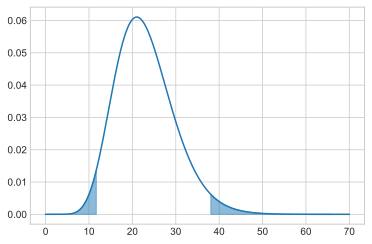

In [14]:
ox = np.linspace(0, 70, 500)
oy = stats.chi2.pdf(ox, df=n - 1)

ox_left = np.linspace(0, t1, 100)
oy_left = stats.chi2.pdf(ox_left, df=n - 1)

ox_right = np.linspace(t2, 70, 100)
oy_right = stats.chi2.pdf(ox_right, df=n - 1)

plt.plot(ox, oy)
plt.fill_between(ox_left, oy_left, alpha=0.5, color='C0')
plt.fill_between(ox_right, oy_right, alpha=0.5, color='C0')

Вычисляем значение статистики и проводим тест:

In [15]:
variance = 0.0625

H = (n - 1) * sample_variance / variance
H

28.720541753333343

Значение не попало в критическую область, гипотезу принимаем.